In [1]:
import os

import numpy as np
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Reload local python files every 2 seconds

%load_ext autoreload
%autoreload 2

In [3]:
RANDOM_STATE = 1234

In [4]:
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

In [5]:
classifier = SVC(random_state=RANDOM_STATE, probability=True)
classifier.fit(X_train, y_train)

acc_train = classifier.score(X_train, y_train)
acc_test = classifier.score(X_test, y_test)
print('Acc. on training set: {:.3f}'.format(acc_train))
print('Acc. on test set:     {:.3f}'.format(acc_test))

Acc. on training set: 0.916
Acc. on test set:     0.930


In [6]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_precision_recall_curve

<Figure size 432x432 with 0 Axes>

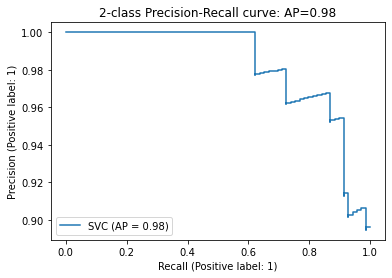

In [7]:
y_score = classifier.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

plt.figure(figsize=(6, 6))
disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
plt.savefig('plots/pr_curve.pdf', format='pdf', dpi=1200, bbox_inches='tight')

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score

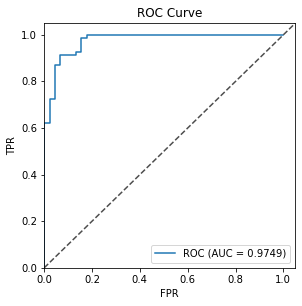

In [16]:
proba = classifier.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, proba[:, 1])
auc_score = roc_auc_score(y_test, proba[:, 1])

plt.figure(figsize=(4.5, 4.5))
plt.xlim(0., 1.05)
plt.ylim(0., 1.05)
plt.plot(fpr, tpr, label='ROC (AUC = %0.4f)' % auc_score)
xx = np.arange(0, 1.2, step=0.1)
plt.plot(xx, xx, ls='--', c='.3')
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.savefig('plots/roc_curve.pdf', format='pdf', dpi=1200, bbox_inches='tight')